In [1]:
import sys
from random import random
sys.path.append('../')
from moed.model import Sequence, Model
from moed.analysis import Analysis
from moed.proc import Proc, Filter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import struct 

X = [x/1000 for x in range(1000)]
with open("../data/pgp_f4-1K-1ms.dat", "br") as f:
    Y = list(struct.unpack('1000f', f.read()))

X[1]

0.001

# Исходные данные

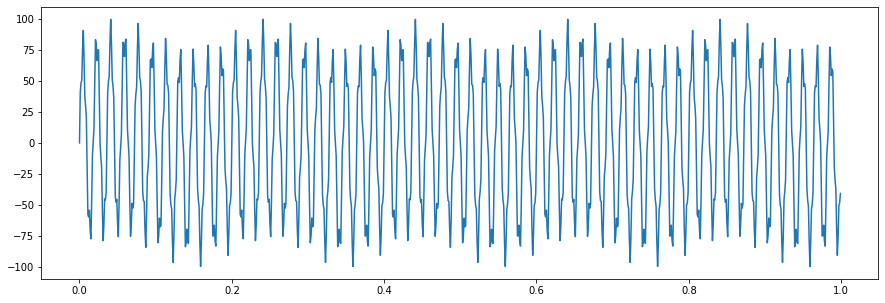

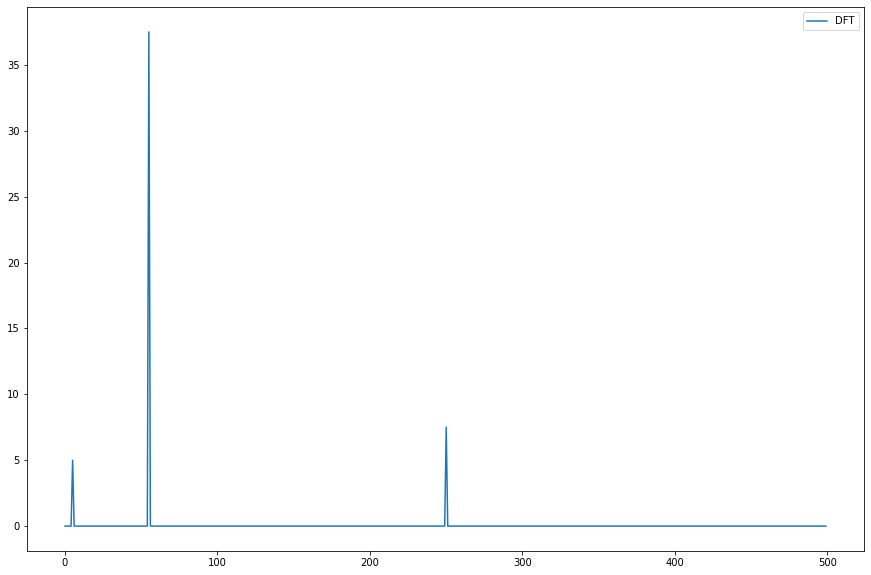

In [3]:
from collections import OrderedDict

signal = Sequence.from_dict(OrderedDict(zip(X,Y)))
dft = Analysis.dft(signal)
signal.plot()
fig, axes = plt.subplots(1, figsize=(15, 10))
axes.plot([x/0.001 for x in dft.x], dft.y, label="DFT")
axes.legend()
plt.show()

# Фльтры в области частот

In [4]:
N = 512

In [5]:
low_pass = Filter.low_pass_filter(N, 0.001, 25)
high_pass = Filter.high_pass_filter(N, 0.001, 200)
low_cut = Filter.low_cut_filter(N, 0.001, 25)
band_stop = Filter.band_pass_filter(N, 0.001, 45, 65)

In [6]:
dft_lp = Analysis.dft(low_pass) * 2*N
dft_hp = Analysis.dft(high_pass) * 2*N
dft_lc = Analysis.dft(low_cut) * 2*N
dft_bs = Analysis.dft(band_stop) * 2*N

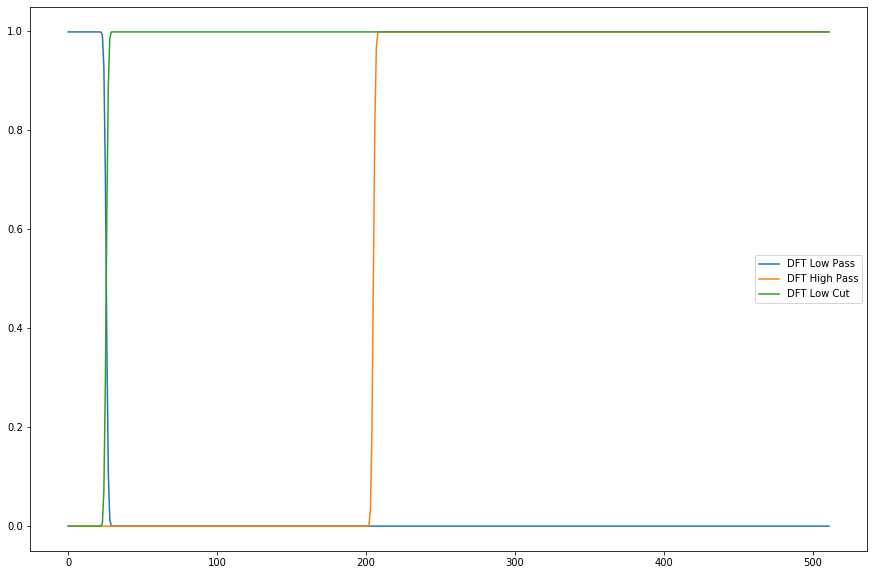

In [7]:
fig, axes = plt.subplots(1, figsize=(15, 10))
axes.plot(dft_lp.x, dft_lp.y, label="DFT Low Pass")
axes.plot(dft_hp.x, dft_hp.y, label="DFT High Pass")
axes.plot(dft_lc.x, dft_lc.y, label="DFT Low Cut")
axes.legend()
plt.show()

# Применение фильтров

In [8]:
from collections import OrderedDict

In [9]:
new_dft = Sequence.from_dict(OrderedDict(zip([x/0.001 for x in dft.x], dft.y)))

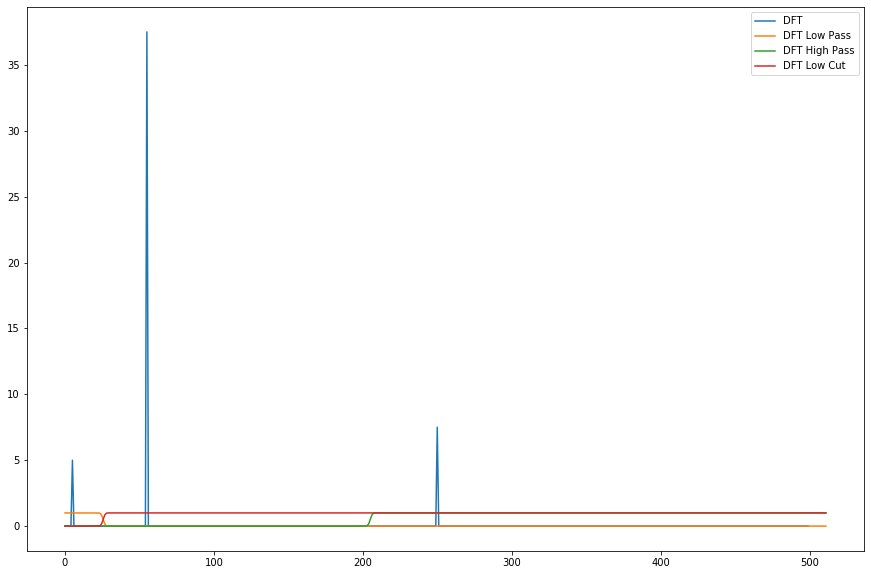

In [10]:
fig, axes = plt.subplots(1, figsize=(15, 10))
axes.plot(new_dft.x, new_dft.y, label="DFT")
axes.plot(dft_lp.x, dft_lp.y, label="DFT Low Pass")
axes.plot(dft_hp.x, dft_hp.y, label="DFT High Pass")
axes.plot(dft_lc.x, dft_lc.y, label="DFT Low Cut")
axes.legend()
plt.show()

In [11]:
dft_lp_res = dft_lp * Sequence.from_dict(OrderedDict(zip([x for x in range(len(dft.x))], dft.y)))
dft_hp_res = dft_hp * Sequence.from_dict(OrderedDict(zip([x for x in range(len(dft.x))], dft.y)))
dft_lc_res = dft_lc * Sequence.from_dict(OrderedDict(zip([x for x in range(len(dft.x))], dft.y)))

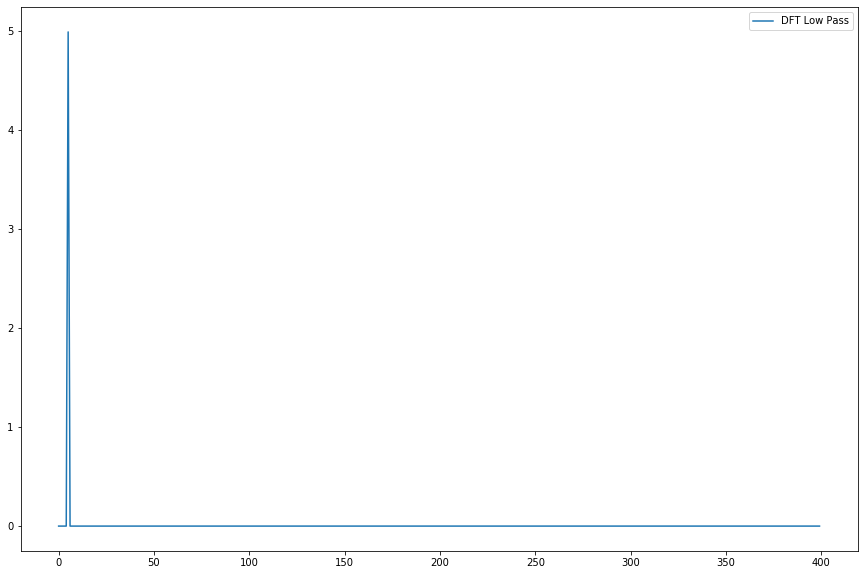

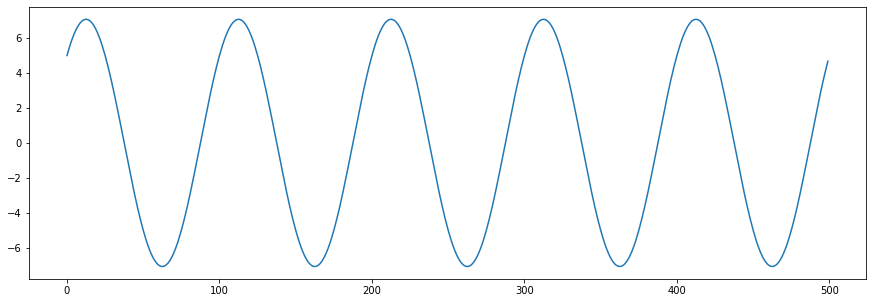

In [12]:
fig, axes = plt.subplots(1, figsize=(15, 10))
axes.plot(dft_lp_res.x[:-100], dft_lp_res.y[:-100], label="DFT Low Pass")
axes.legend()
plt.show()
Analysis.idft(dft_lp_res).plot()

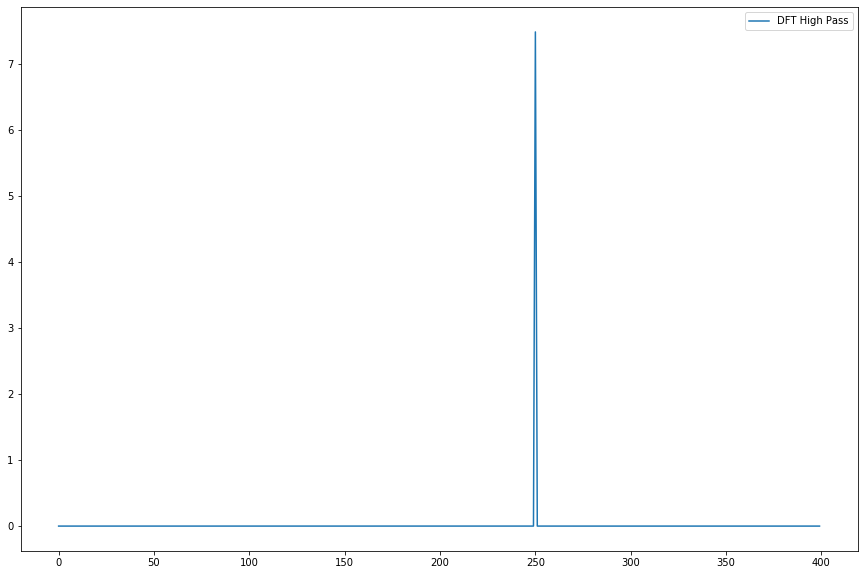

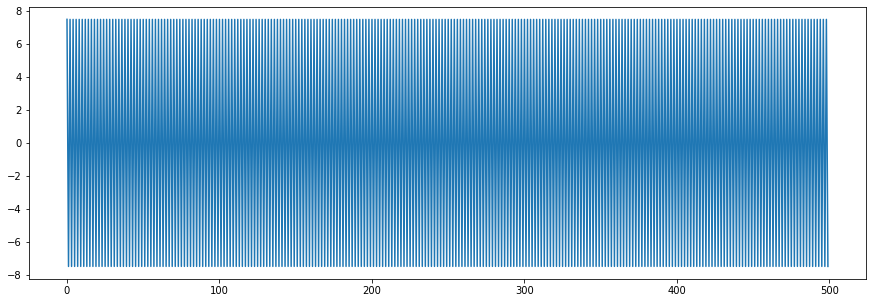

In [13]:
fig, axes = plt.subplots(1, figsize=(15, 10))
axes.plot(dft_hp_res.x[:-100], dft_hp_res.y[:-100], label="DFT High Pass")
axes.legend()
plt.show()
Analysis.idft(dft_hp_res).plot()

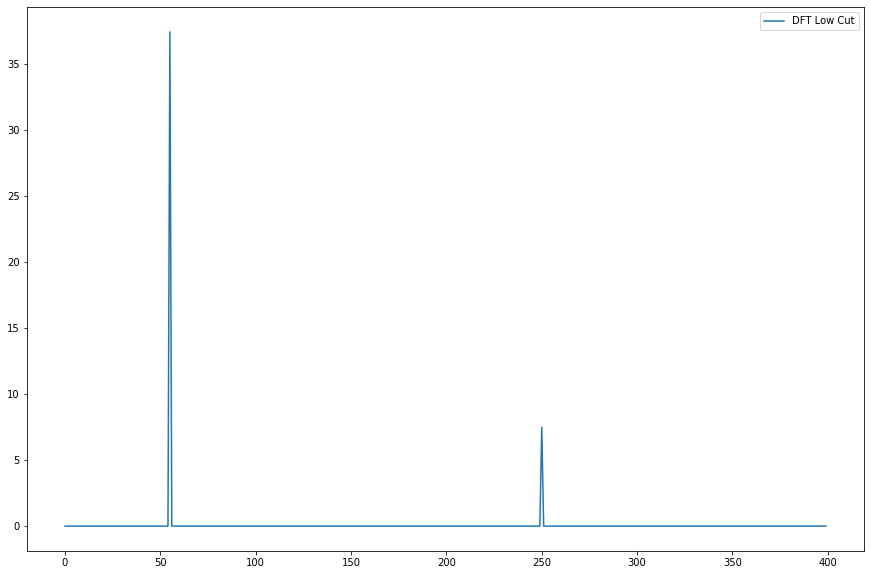

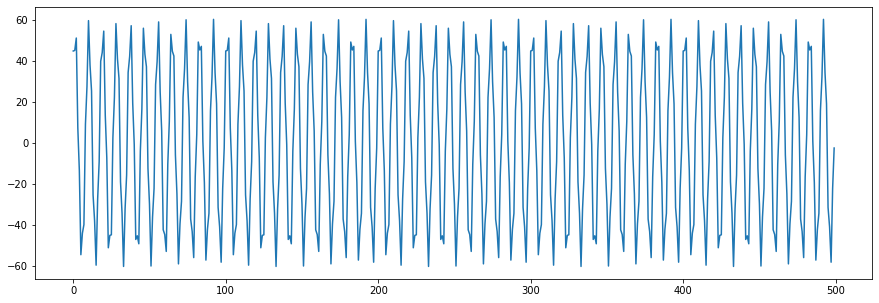

In [14]:
fig, axes = plt.subplots(1, figsize=(15, 10))
axes.plot(dft_lc_res.x[:-100], dft_lc_res.y[:-100], label="DFT Low Cut")
axes.legend()
plt.show()
Analysis.idft(dft_lc_res).plot()

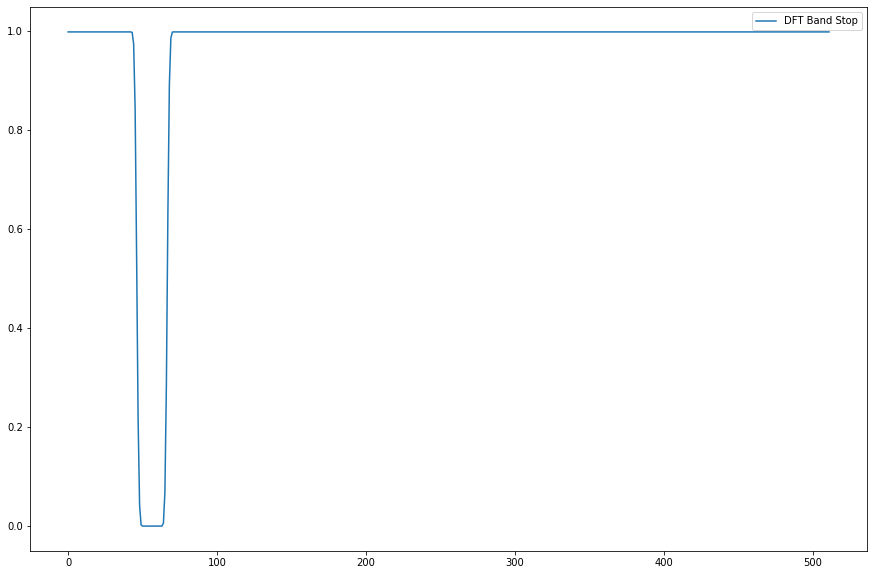

In [15]:
fig, axes = plt.subplots(1, figsize=(15, 10))
axes.plot(dft_bs.x, dft_bs.y, label="DFT Band Stop")
axes.legend()
plt.show()

In [16]:
dft_bs_res = dft_bs * Sequence.from_dict(OrderedDict(zip([x for x in range(len(dft.x))], dft.y)))

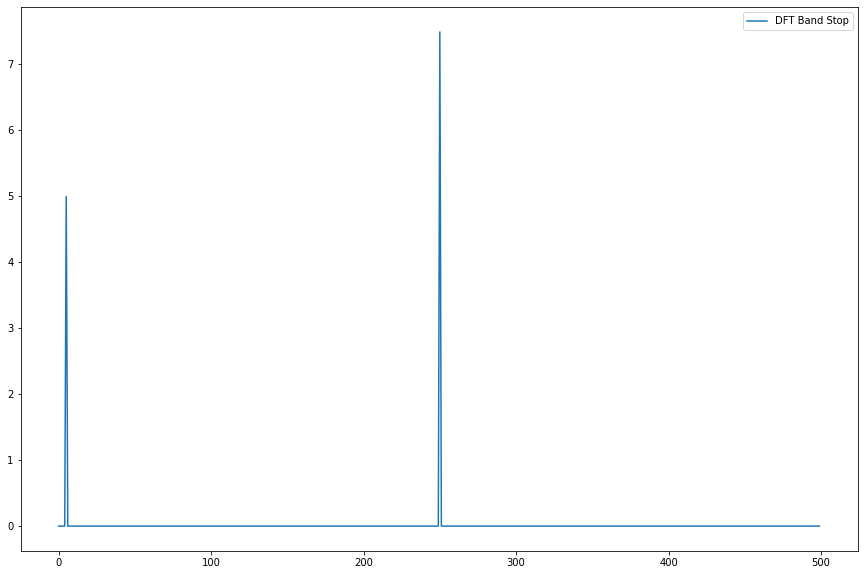

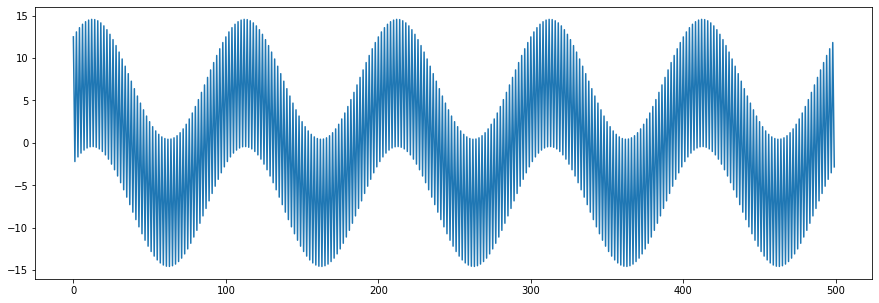

In [17]:
fig, axes = plt.subplots(1, figsize=(15, 10))
axes.plot(dft_bs_res.x, dft_bs_res.y, label="DFT Band Stop")
axes.legend()
plt.show()
Analysis.idft(dft_bs_res).plot()

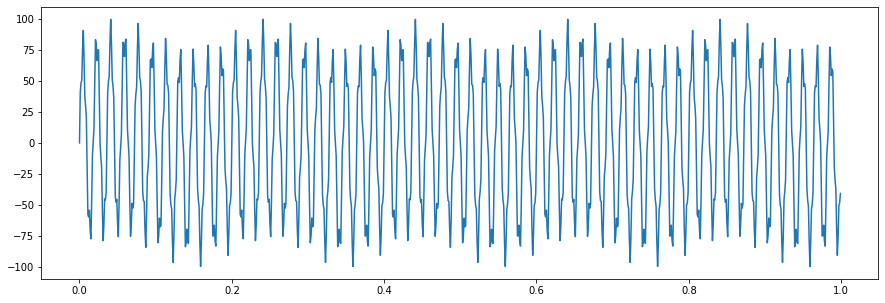

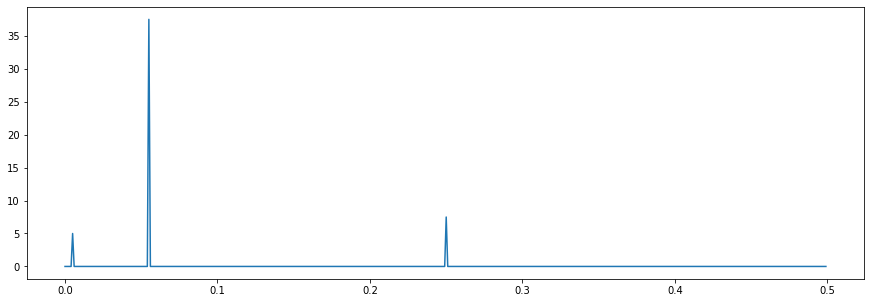

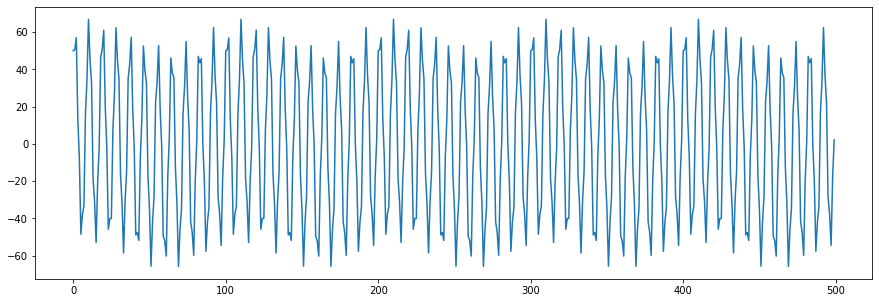

In [18]:
signal.plot()
Analysis.dft(signal).plot()
Analysis.idft(Analysis.dft(signal)).plot()